# R1 - NOTA 6

Quantidade de contornos encontrado:  7


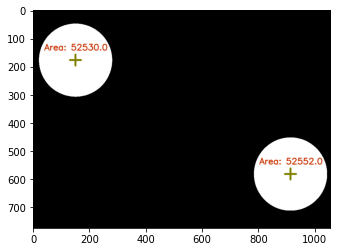

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

image_lower_hsv = np.array([0, 50, 100])  
image_upper_hsv = np.array([179, 255, 255])

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy()

contornosOrdenados = sorted(contornos, key=lambda x: cv2.contourArea(x), reverse=True)

for c in contornosOrdenados:
    if cv2.contourArea(c) < cv2.contourArea(contornosOrdenados[1]):
        cv2.drawContours(contornos_img, [c], -1, 0, -1)

cnt1 = contornosOrdenados[0]
cnt2 = contornosOrdenados[1]

m1 = cv2.moments(cnt1)
m2 = cv2.moments(cnt2)

cxBola1 = int(m1['m10']/m1['m00'])
cyBola1 = int(m1['m01']/m1['m00'])


cxBola2 = int(m2['m10']/m2['m00'])
cyBola2 = int(m2['m01']/m2['m00'])

size = 20
color = (128,128,0)


cv2.line(contornos_img,(cxBola1 - size,cyBola1),(cxBola1 + size,cyBola1),color,5)
cv2.line(contornos_img,(cxBola1,cyBola1 - size),(cxBola1, cyBola1 + size),color,5)

cv2.line(contornos_img,(cxBola2 - size,cyBola2),(cxBola2 + size,cyBola2),color,5)
cv2.line(contornos_img,(cxBola2,cyBola2 - size),(cxBola2, cyBola2 + size),color,5)

font = cv2.FONT_HERSHEY_SIMPLEX
text1 = cv2.contourArea(contornosOrdenados[0])
text2 = cv2.contourArea(contornosOrdenados[1])
origem1 = (cxBola1 - 110,cyBola1 - 35)
origem2 = (cxBola2 - 110,cyBola2 - 35)

cv2.putText(contornos_img, ("Area: " + str(text1)), origem1, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, ("Area: " + str(text2)), origem2, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img)

print("Quantidade de contornos encontrado: ", len(contornos))

# R2 - NOTA 8

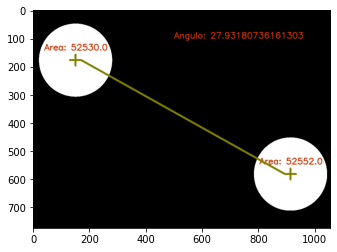

In [5]:
import math

cv2.line(contornos_img, (cxBola1 - size,cyBola1),(cxBola2 + size,cyBola2), color, 5)

angulo = "Angulo: " + str((math.degrees(math.atan2(cyBola1 - cyBola2,cxBola1 - cxBola2))))
cv2.putText(contornos_img, str(angulo), (500,100), font,1,(200,50,0),2,cv2.LINE_AA)

plt.imshow(contornos_img)

